# ANC Assignment 3

prepared by Danila Danko

## Problem 1

In [3]:
# Task 1

from sympy import *

t = symbols('t')
x1, x2 = symbols('{x}_{1}, {x}_{2}', real=True, cls=Function)
x_1 = x1(t)
x_2 = x2(t)
dx1t, dx2t = symbols('\\dot{x}_{1}, \\dot{x}_{2}', real = True)


V = x_1 ** 2 / (1 + x_1 ** 2) ** 2 + x_2 ** 2
dV = V.diff(t)
dv = dV.subs([(Derivative(x_1, t), dx1t), (Derivative(x_2, t), dx2t)])
dv
# print(latex(dV))

2*\dot{x}_{1}*{x}_{1}(t)/({x}_{1}(t)**2 + 1)**2 - 4*\dot{x}_{1}*{x}_{1}(t)**3/({x}_{1}(t)**2 + 1)**3 + 2*\dot{x}_{2}*{x}_{2}(t)

## Problem 2

In [5]:
t, c = symbols('t c')
x1, x2 = symbols('x_{1}, x_{2}', real=True, cls=Function)

x_1 = x1(t)
x_2 = x2(t)
dx1 = x_1 * (x_1 ** 2 + x_2 ** 2 - c) - 4 * x_1 * x_2 ** 2
dx2 = 4 * x_1 ** 2 * x_2 + x_2 * (x_1 ** 2 + x_2 ** 2 - c)
x1t, x2t = symbols('x_{1}, x_{2}')

V = x1(t) ** 2  + x2(t) ** 2
dV = V.diff(t)
dv = simplify(dV.subs([(Derivative(x_1,t), dx1), (Derivative(x_2,t), dx2)]))
dv = factor(dv.subs([(x_1, x1t), (x_2, x2t)]))
print(latex(dv))
dv

- 2 \left(x_{1}^{2} + x_{2}^{2}\right) \left(c - x_{1}^{2} - x_{2}^{2}\right)


-2*(x_{1}**2 + x_{2}**2)*(c - x_{1}**2 - x_{2}**2)

## Problem 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as sp
from sympy.utilities.lambdify import lambdify

plt.rcParams['font.size'] = '16'


### Formula derivation

In [ ]:

t, Hd, du, k = symbols('t H_{d} \\dot{u} k')
theta, H, u, m = symbols('\\theta H u m', cls=Function)
dtheta = Derivative(theta(t))
ddtheta = Derivative(dtheta,t)
dtheta = u(t) - sin(theta(t)) - ddtheta
Htilde = Hd - H(t)
V = Rational(1,2) * Htilde ** 2
Hsub = Rational(1,2) * dtheta ** 2 + 1 - cos(theta(t))
dv = V.diff(t)
# dv
dv = dv.subs([(Derivative(H(t), t), Derivative(Hsub, t)),(H(t),Hsub)])
dv = simplify(dv)
dv

th = sqrt(2 * Hd) * tanh(k * theta(t))

usub = ddtheta + sin(theta(t)) - th
dv = simplify(dv.subs([(u(t), usub)]))
factor(dv)

dthetasub = - th
dv = dv.subs([(Derivative(theta(t), t), dthetasub)])
dv
thetasub = symbols("\\theta")
dv = factor(simplify(dv.subs([(theta(t), thetasub)])))
print(latex(dv))
dv

### Plotting

/tmp/ipykernel_1399978/1295650639.py:23: RuntimeWarning: overflow encountered in cosh
  ddphi = l / (np.cosh(M * phi)) ** 2
/tmp/ipykernel_1399978/1295650639.py:23: RuntimeWarning: overflow encountered in double_scalars
  ddphi = l / (np.cosh(M * phi)) ** 2
/tmp/ipykernel_1399978/1295650639.py:23: RuntimeWarning: overflow encountered in cosh
  ddphi = l / (np.cosh(M * phi)) ** 2
/tmp/ipykernel_1399978/1295650639.py:23: RuntimeWarning: overflow encountered in double_scalars
  ddphi = l / (np.cosh(M * phi)) ** 2
/tmp/ipykernel_1399978/1295650639.py:23: RuntimeWarning: overflow encountered in cosh
  ddphi = l / (np.cosh(M * phi)) ** 2
/tmp/ipykernel_1399978/1295650639.py:23: RuntimeWarning: overflow encountered in double_scalars
  ddphi = l / (np.cosh(M * phi)) ** 2
/tmp/ipykernel_1399978/1295650639.py:23: RuntimeWarning: overflow encountered in cosh
  ddphi = l / (np.cosh(M * phi)) ** 2
/tmp/ipykernel_1399978/1295650639.py:23: RuntimeWarning: overflow encountered in double_scalars
  ddph

[ 1.00000000e+00 -5.77296425e-50 -2.42559040e-49 -4.27388438e-49
 -5.27959573e-49 -3.43130179e-49 -1.58300786e-49  2.65286069e-50
  2.11358000e-49  3.96187393e-49]
[-1.00000000e+00  5.75017250e-49  5.73308720e-49  5.71600190e-49
  5.28145873e-49  3.43256178e-49  1.58366483e-49 -2.65232120e-50
 -2.11412907e-49 -3.96302602e-49]
[ 5.00000000e+00  9.59263930e-42  4.10583883e-41  7.25241373e-41
  8.97020616e-41  5.82363129e-41  2.67705642e-41 -4.69518452e-42
 -3.61609332e-41 -6.76266819e-41]
[-5.00000000e+00 -9.55449875e-42 -4.08959090e-41 -7.22373193e-41
 -8.93499531e-41 -5.80085429e-41 -2.66671326e-41  4.25611121e-49
  2.22904400e-49  2.01976787e-50]


[]

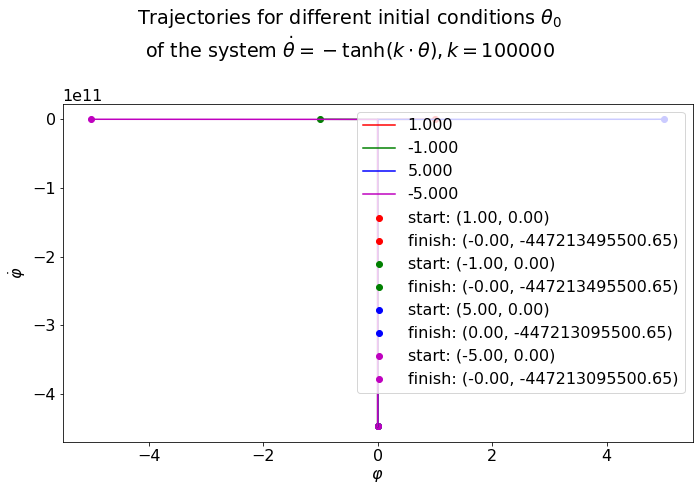

In [3]:
# TODO phase plot
T_START = 0
T_END = 1000000
N_LIM = 10000
T_LINSPACE = np.linspace(0,T_END,N_LIM)
PHI_0 = [1, -1, 5, -5]
K = 1
M = 100000
Hd = 10

def sign(x):
    return np.tanh(M * x)

# https://stackoverflow.com/a/43843544
# using tanh instead of sign function

def get_dphi(phi): return -sign(phi) * np.sqrt(2 * Hd)

def sys_1(state, t):
    phi, dphi = state
    dphi = get_dphi(phi)
    l = -M * np.sqrt(2 * Hd)
    ddphi = l / (np.cosh(M * phi)) ** 2
    return np.array([dphi, ddphi])

def f (phi_0, color):
    y0 = np.array([phi_0,0])
    ys = odeint(func=sys_1,y0=y0,t=T_LINSPACE,mxstep=50000,atol=1e-5)
    # ys[:,1][ys[:,1] < -1000] = -1000000
    # ys = ys[:-200]
    axs.plot(ys[:,0],ys[:,1],label=f"{phi_0:.3f}",c=color)
    # axs.plot(T_LINSPACE,ys[:,1],label=f"{phi_0:.3f}",c=color)
    print(ys[:10,0])
    axs.scatter([ys[0,0]],[ys[0,1]],label=f"start: ({ys[0,0]:.2f}, {ys[0,1]:.2f})",marker='o',c=color)
    axs.scatter([ys[-1,0]],[ys[-1,1]],label=f"finish: ({ys[-1,0]:.2f}, {ys[-1,1]:.2f})",marker='o',c=color)
    axs.legend()
    axs.grid()
    axs.set_xlabel("$\\varphi$")
    axs.set_ylabel("$\\dot{\\varphi}$")

fig, axs = plt.subplots(1,1,figsize=(10,7))
fig.suptitle(
    f"Trajectories for different initial conditions $\\theta_{{0}}$\n"+\
        f"of the system $\\dot{{\\theta}}=-\\tanh(k \\cdot \\theta), k = {M}$")


colors = ['r', 'g', 'b', 'm'][:len(PHI_0)]
for x, color in zip(PHI_0, colors):
    f(x, color)


plt.tight_layout()
plt.plot()

# print(np.cosh(0.0001))

## Problem 4

[]

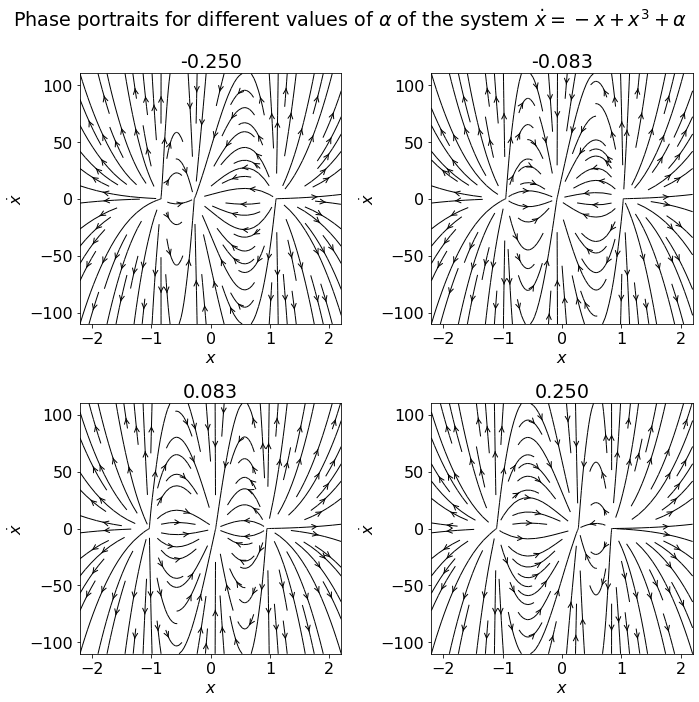

In [7]:
HEIGHT = 2
X_RANGE = [2,100]
N = 30
K = 1.1
SCALE = 5
ALPHAS = np.linspace(-1/4, 1/4, 4)
WIDTH = 2

X1_MAX, X2_MAX = X_RANGE
X1_SPAN = np.linspace(-K*X1_MAX, K*X1_MAX, N)
X2_SPAN = np.linspace(-K*X2_MAX, K*X2_MAX, N)
X1_GRID, X2_GRID = np.meshgrid(X1_SPAN, X2_SPAN)


def sys(state, alpha):
    x, dx = state
    nddx = -dx + 3 * x ** 2 * dx
    ndx = -x + x**3 + alpha
    return np.array([ndx, nddx])

def f (alpha,ax):
    dx1, dx2 = sys(state=[X1_GRID, X2_GRID], alpha=alpha)
    ax.streamplot(x=X1_SPAN, y=X2_SPAN, u=dx1, v=dx2,
            arrowsize=1.2, # size of the arrows 
           density=1, # density of the vectorfield
           color='k', # color for the trajectories
           linewidth=1, # the width of the lines for trajectories 
           arrowstyle='->') # you can change type of arrows
    ax.set_title(f"{alpha:.3f}")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$\\dot{{x}}$")

fig,axs = plt.subplots(nrows=HEIGHT,ncols=WIDTH,figsize=(WIDTH * SCALE, HEIGHT * SCALE))
fig.suptitle(f"Phase portraits for different values of $\\alpha$ "+\
        f"of the system $\\dot{{x}}=-x + x^3 + \\alpha$")
fig.subplots_adjust(wspace=0.6)

for l,alpha in enumerate(ALPHAS):
    i = l // WIDTH
    j = l % WIDTH
    f(alpha=alpha, ax = axs[i,j])

plt.tight_layout()
plt.plot()